In [1]:
# prediction diabetes using KNN algorithm
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load the dataset
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# values of 'Glucose', 'BloodPressure', etc cannot be accepted as Zeros will affect the results
# replace such vàlues with the mean of respective column.
# take the 1ist of columns where the 0s should be replaced 'Insulin']
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for i in col_list:
    # replace 0s by NaN values
    df[i]= df[i].replace (0, np.NaN)
    # calculate mean by skipping the rows having NaN values
    mean = int(df[i].mean(skipna=True))
    # replace NaN values by mean value
    df[i] = df[i].replace (np.NaN, mean)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [4]:
# split the dataframe into features and target data
x = df.iloc[: , :8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [5]:
y = df.iloc[:, 8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [8]:
# let us find k values and accuracy levels for each k
# append accuracy levels to scores 1ist
k_range = range (1, 20) # take k from 1 to 19
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    scores.append(accuracy)
    print('k= %d ACcuracy= %.2f%%' % (k, accuracy*100))

k= 1 ACcuracy= 65.58%
k= 2 ACcuracy= 72.08%
k= 3 ACcuracy= 72.73%
k= 4 ACcuracy= 76.62%
k= 5 ACcuracy= 75.32%
k= 6 ACcuracy= 76.62%
k= 7 ACcuracy= 75.97%
k= 8 ACcuracy= 76.62%
k= 9 ACcuracy= 75.32%
k= 10 ACcuracy= 75.32%
k= 11 ACcuracy= 75.97%
k= 12 ACcuracy= 75.97%
k= 13 ACcuracy= 78.57%
k= 14 ACcuracy= 79.22%
k= 15 ACcuracy= 77.27%
k= 16 ACcuracy= 75.32%
k= 17 ACcuracy= 76.62%
k= 18 ACcuracy= 76.62%
k= 19 ACcuracy= 78.57%


Text(0, 0.5, 'Accuracy')

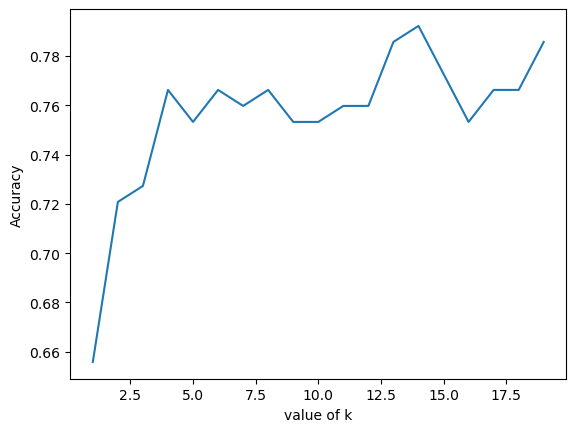

In [9]:
# show the k values and scores in line plot
# we can see highest accuracy when k=14
import matplotlib.pyplot as plt
plt.plot (k_range, scores)
plt.xlabel ("value of k")
plt.ylabel ("Accuracy")

In [11]:
# create KNN classifier obiject with k=14
model = KNeighborsClassifier(n_neighbors=14, metric='euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [12]:
# find accuracy
accuracy = model.score (x_test, y_test)
accuracy 

0.7922077922077922

In [17]:
# predict for the given data
model.predict([[1,189,60,23, 846,30.1,0.398, 59]]) #array([1]) -> diabetic

C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [18]:
model.predict([[3,126,88,41,235,39.3, 0.704, 27]]) #array([0]) -> not diabetic

C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)